In [1]:

import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io,filters
import math
import copy
import pandas as pd
import os

import sys
sys.path.append("..")
from Utility.segmentation_utils import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



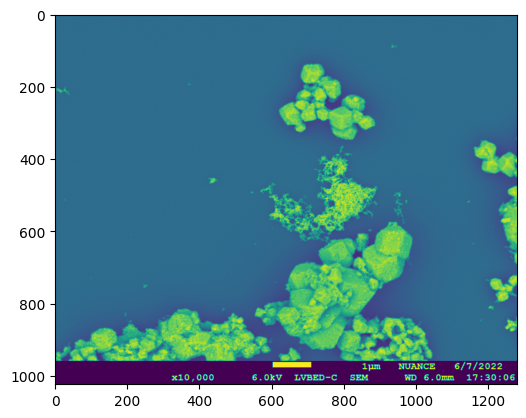

In [2]:
# Load Data
interesting_files = ['../Images/Additional/L1 2.5, 5, 10 nM mixing assembly/L1 2.5 nM mixing /2.5nM_L1_inversion_01.tif',
                    "../Images/Additional/Si embed/2_01.tif"]
Alexa_files = glob.glob('../Images/Additional/Images for model (from Alexa)/*')
Si_files = glob.glob('../Images/Additional/Si embed/*')
train_files = glob.glob('../Images/Training/*')
img_orig = io.imread(train_files[0])
plt.imshow(img_orig)
blur = filters.gaussian(img_orig, sigma=(7,7))

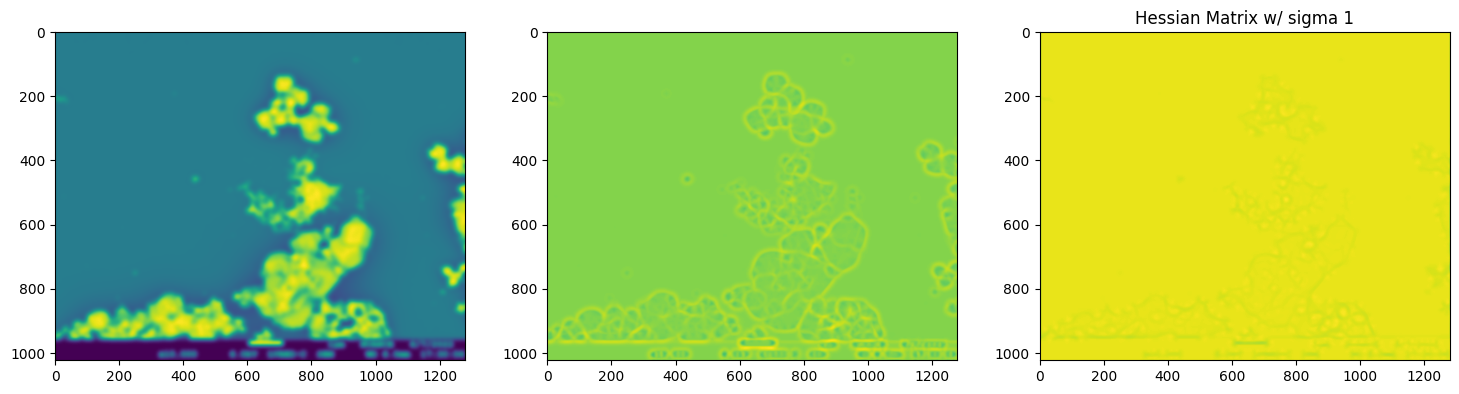

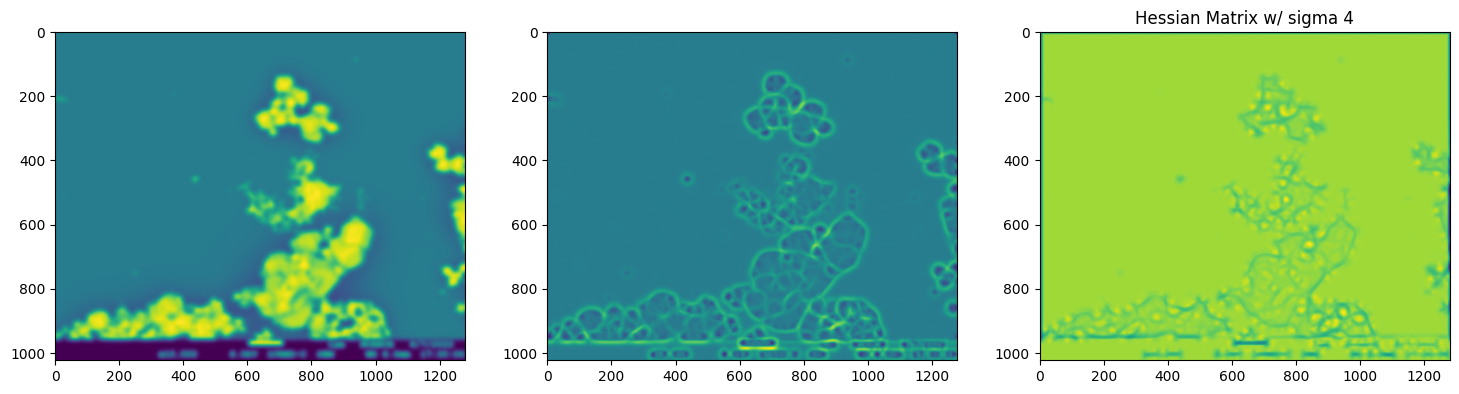

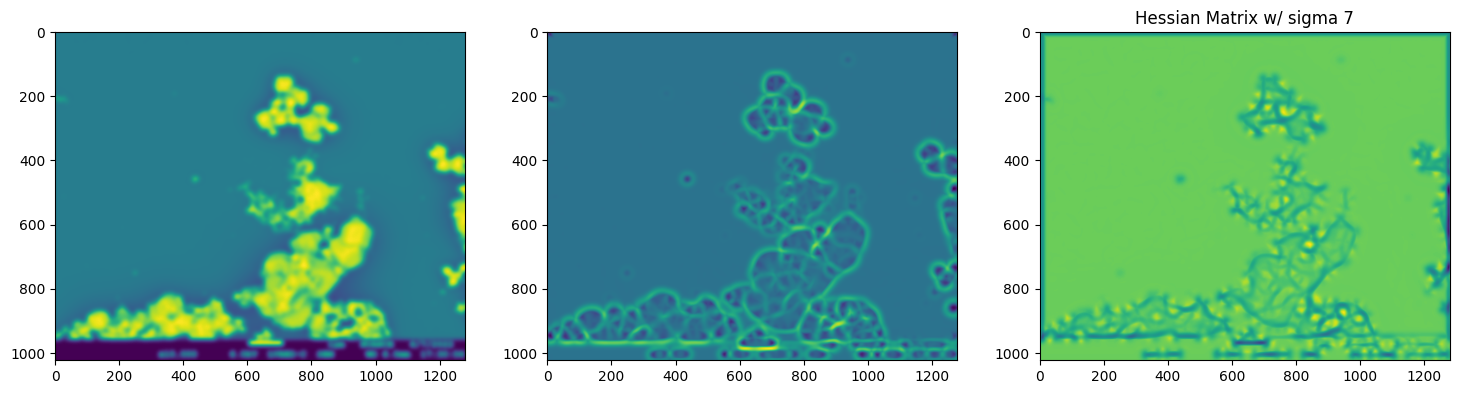

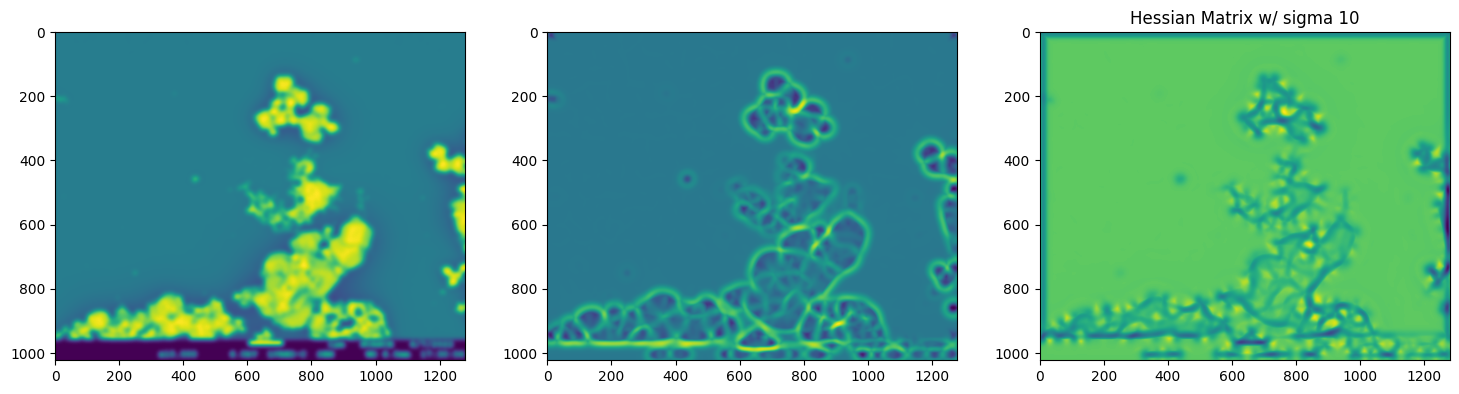

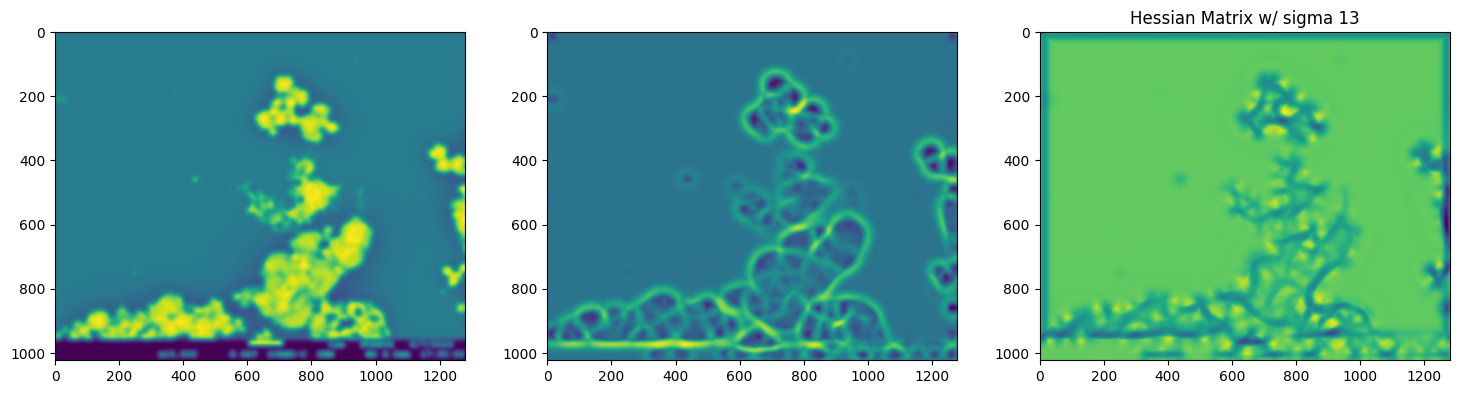

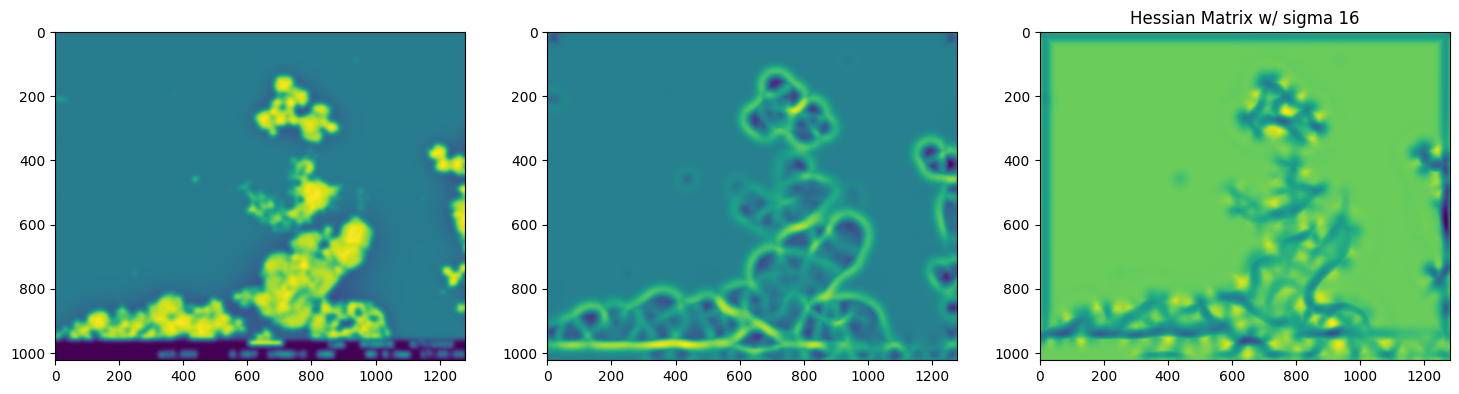

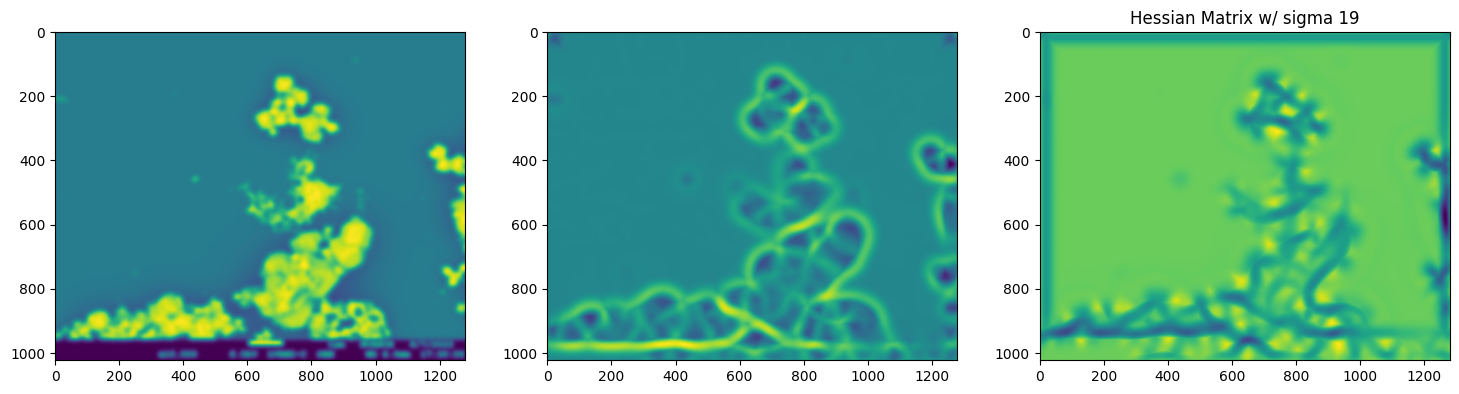

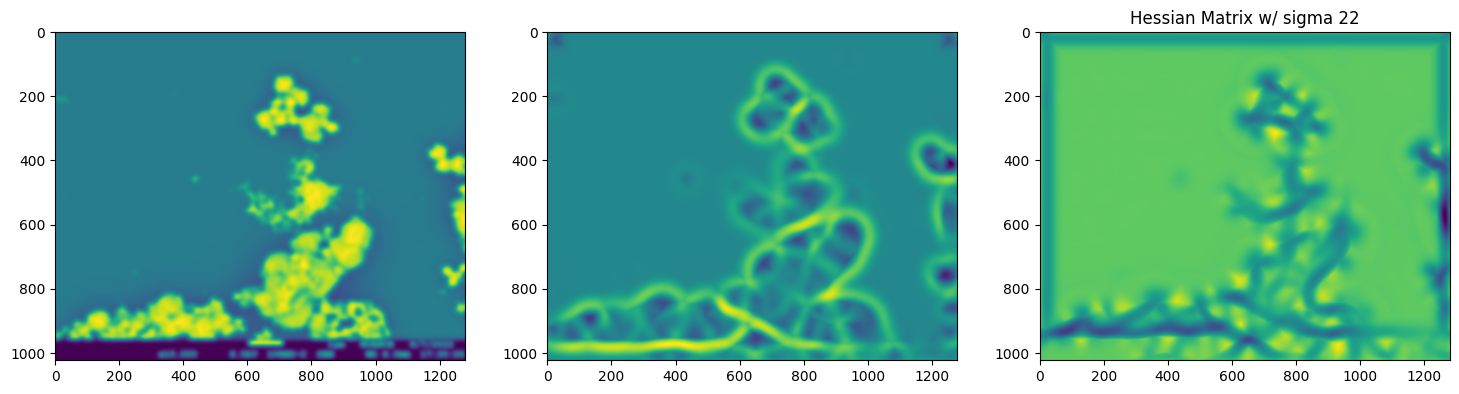

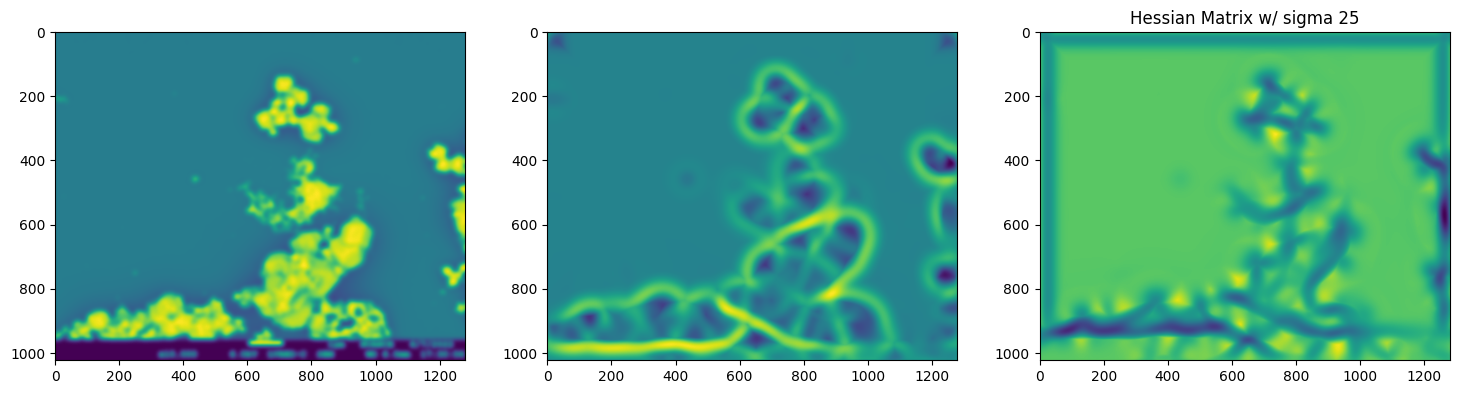

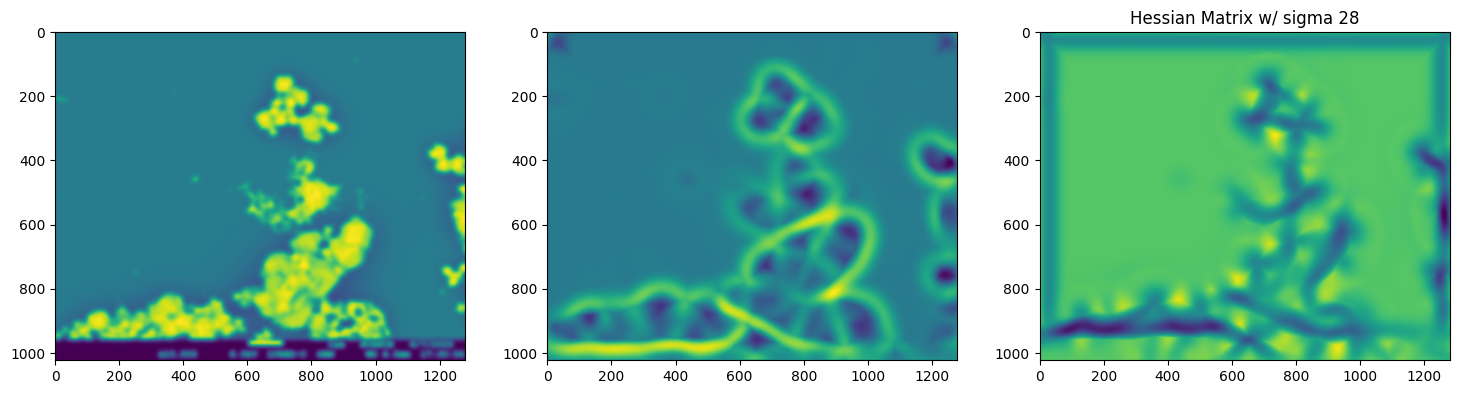

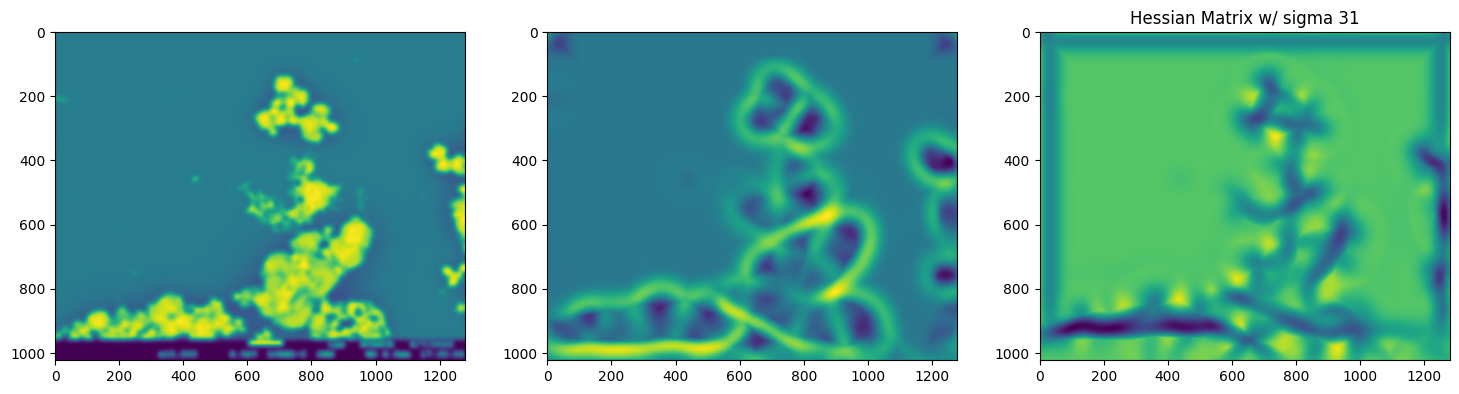

In [3]:
# Hessian Matrix
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

for sigma in np.arange(1,32,3):
    #sigma = 7
    hxx,hxy,hyy = hessian_matrix(blur,sigma)
    maxima,minima = hessian_matrix_eigvals((hxx,hxy,hyy))

    fig, ax = plt.subplots(1,3,figsize=(18,20))
    ax[0].imshow(blur)
    ax[1].imshow(maxima)
    ax[2].imshow(minima)
    plt.title("Hessian Matrix w/ sigma {}".format(sigma))
    plt.show()

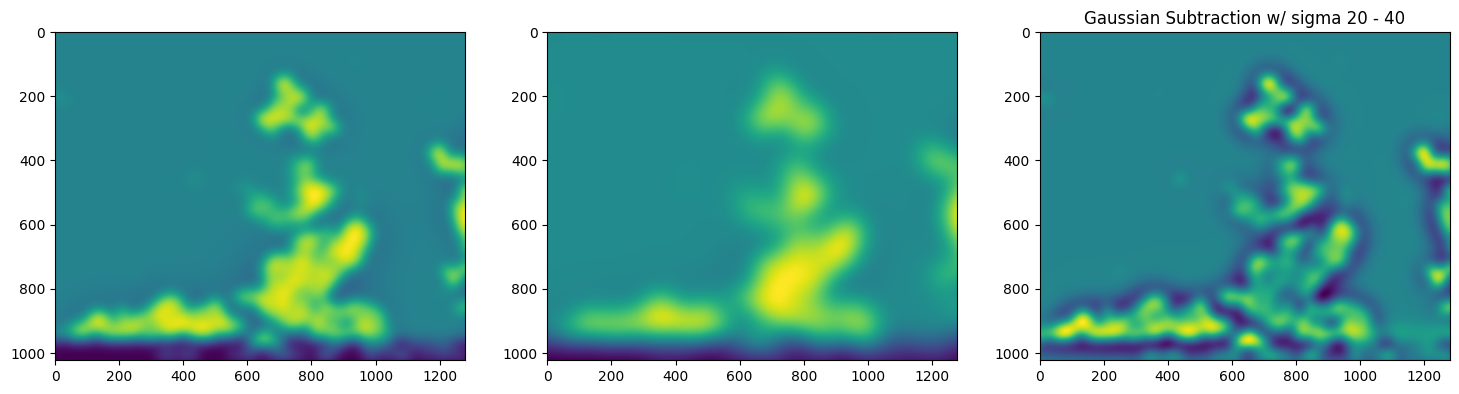

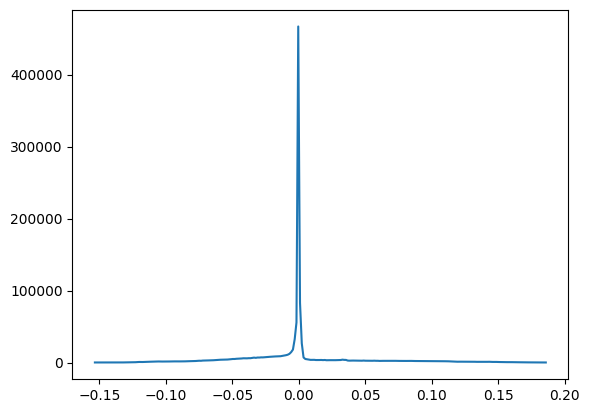

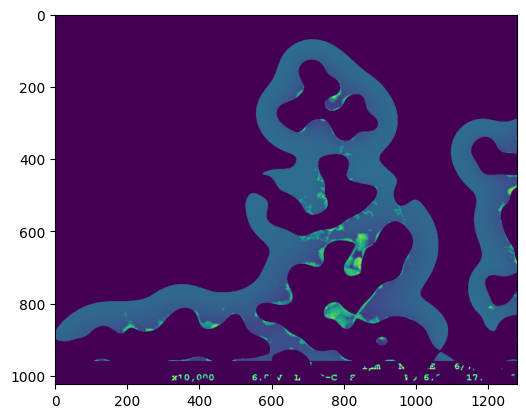

In [7]:
# Gaussian Subtraction
#sigma = 7

sigma1 = 20
blur1 = filters.gaussian(img_orig,
                          sigma=(sigma1,sigma1))
sigma2 = 40
blur2 = filters.gaussian(img_orig,
                          sigma=(sigma2,sigma2))
diff = blur1-blur2
fig, ax = plt.subplots(1,3,figsize=(18,20))
ax[0].imshow(blur1)
ax[1].imshow(blur2)
ax[2].imshow(blur1-blur2)
plt.title("Gaussian Subtraction w/ sigma {} - {}".format(sigma1,sigma2))
plt.show()

histogram, bin_edges = np.histogram(diff,bins=256)
plt.plot(bin_edges[0:-1],histogram)
plt.show()
check = copy.deepcopy(diff)
check[check>0] = 0
mod_mean = np.sum(check)/(np.count_nonzero(check))
check[check >= mod_mean/4] = 0
check[check != 0] = 256/2
plt.imshow(check)

alpha = .5
overlaid = copy.deepcopy(img_orig)#*alpha + check*(1-alpha)
overlaid[check == 0] = 0 
plt.imshow(overlaid)
plt.show()